### Gerry William Nanlohy / 2440018854 / LB01 / Assignment 05

##### Importing Data from Various Sources

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading Excel Files

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
dataset.shape

(400, 3)

##### Data Reading

In [10]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [12]:
dataset.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [13]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Predict Purchased (1) or Not Purchased (0) and Visualising the Training and Test set results.

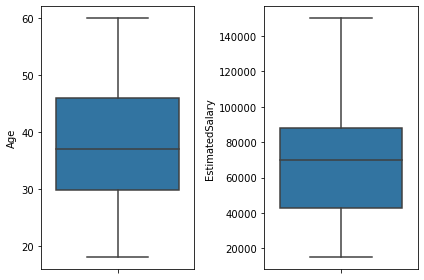

In [20]:
plt.subplot(1,2,1)
sns.boxplot(y=dataset['Age'], data = dataset)
plt.subplot(1,2,2)
sns.boxplot(y=dataset['EstimatedSalary'], data = dataset)
plt.tight_layout()
plt.show()

#### Extract independent and dependent variable

##### Independent Variable

In [21]:
x = dataset.iloc[:, :-1]
print('x:')
print(x.head())

x:
   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


##### Dependent Variable

In [22]:
y = dataset.iloc[:, 2]
print('y:')
print(y.head())

y:
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


#### Splitting dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [26]:
print('Training set:', x_train.shape, y_train.shape)

Train set: (320, 2) (320,)


In [27]:
print('Testing set:', x_test.shape, y_test.shape)

Testing set: (80, 2) (80,)


#### Transform Independent Variable

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

In [31]:
x_train = sc.fit_transform(x_train)

In [32]:
x_test = sc.fit_transform(x_test)

#### Build and Training The Model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)

#### Predicting Independent Variable with Model

In [36]:
y_train_predict = model.predict(x_train)

In [37]:
y_test_predict = model.predict(x_test)

In [45]:
import warnings
from matplotlib.colors import ListedColormap
with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")

    plt.tigure(figsize = (12,4))
    plt.subplot(1,2,1)
    
    x_set, y_set = sc.inverse_transform(x_train), y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 6].min() - 16, stop = x_set[:, 6].max() + 16, step = 6.25),np.arange(start = x_set[:, 1].min() - 1666, stop = x_set[:, 1].max() + 1666, step = 6.25))
    plt.contourf(x1, X2, model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),alpha = 6.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.y1im(x2.min(), x2.max())

    for i, j in enumerate(np.unique(y_set)):
    plt.scatter (x_set[y_set == j, 6], x_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('Logistic Regression (Training Set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    
    plt.subplot(1,2,2)
    
    x_set, y_set = sc.inverse_transform(x_test), y_test
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 6]. min() - 16, stop = x_set[:, 6].max() + 16, step = 6.25), np.arange(start = x_set[:, 1].min() - 1666, stop = x_set[:, 1].max() + 1666, step = 6.25))
    plt.contourf(x1, x2, model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape), alpha = 6.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.y1im(x2.min(), x2.max())
                    
    for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 6], x_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    plt.title('Logistic Regression (Testing Set)')
    plt.xlabel('Age')
    plt.ylabe1('Estimated Salary')
    p1t.1egend()
    
    plt.tight_layout()
    plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

#### End of Code